In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Mounted at /content/drive


In [ ]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

from dmdt_functions import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pandas import read_parquet, DataFrame, concat
from numpy import linspace, load
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [ ]:
# filtered_lightcurves_file = "/home/shoaib/PSChallenge/filtered_lightcurves.parquet"
filtered_lightcurves_file = Thesis_Files + "/filtered_lightcurves.parquet"

### The following bins are simply linear bins
nxbins, nybins = 51, 51
dm_bins = linspace(-1, 1, nybins)
dt_bins = linspace(0, 1160, nxbins)

### The following bins ensure each bins has equal dm and dt occurances for our entire sample
# dm_bins = load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
# dt_bins = load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

# These files do'nt exist yet, they are save paths for later in the notebook
# dmdt_by_Name_Band_50x50_equivalent_bins = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'
# dmdt_by_Name_Band_linear_bins = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_linear_bins.pkl'
dmdt_by_Name_Band_linear_bins = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_linear_hex_bins.pkl'

In [ ]:
### By experimentation we know that these are good bins

frac = 0.2
all_lightcurves = read_parquet(filtered_lightcurves_file)
all_names = all_lightcurves['name'].unique()
subset_names = np.random.choice(all_names, size=int(all_names.size * frac), replace=False)
all_lightcurves = all_lightcurves[all_lightcurves['name'].isin(subset_names)]

In [ ]:
random_name = np.random.choice(all_lightcurves['name'].to_numpy(), size=1, replace=False)[0]
random_lc_df = all_lightcurves[all_lightcurves['name'] == random_name]
random_lc_df = random_lc_df.sort_values(by=['band', 'mjd'])

random_r_mags = random_lc_df[random_lc_df['band'] == 'r']['mag'].to_numpy()
random_g_mags = random_lc_df[random_lc_df['band'] == 'g']['mag'].to_numpy()

random_r_times = random_lc_df[random_lc_df['band'] == 'r']['mjd'].to_numpy()
random_g_times = random_lc_df[random_lc_df['band'] == 'g']['mjd'].to_numpy()


random_dm_r, random_dt_r = get_differenciation(random_r_mags, random_r_times)
random_dm_g, random_dt_g = get_differenciation(random_g_mags, random_g_times)

In [ ]:
random_dm_r.shape

(703,)

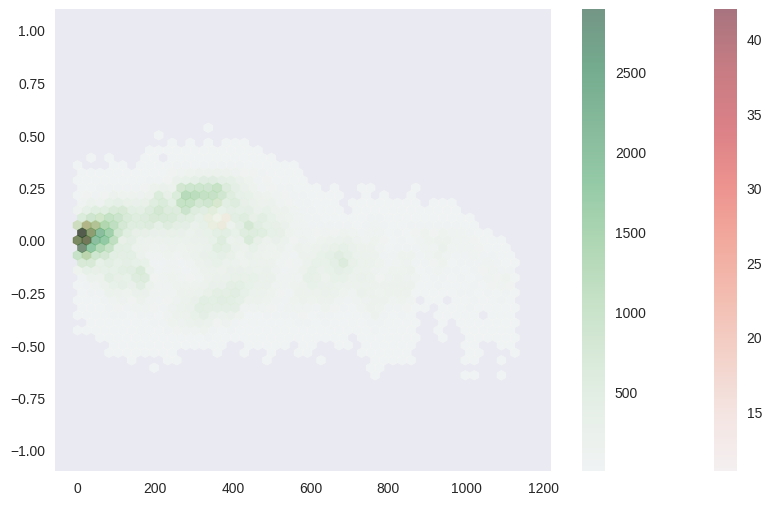

In [ ]:
extent = [dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]]

plt.figure(figsize=(10, 6))
hist1 = plt.hexbin(random_dt_r, random_dm_r, gridsize=50, cmap='Reds', mincnt=11, alpha=0.5, extent=extent)
hist2 = plt.hexbin(random_dt_g, random_dm_g, gridsize=50, cmap='Greens', mincnt=1, alpha=0.5, extent=extent)
plt.colorbar(hist1, orientation='vertical')
plt.colorbar(hist2, orientation='vertical')
# plt.margins(0.1) # Uncomment this if hex bins are partially outside of plot limits

plt.show()

In [ ]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1160, 50), np.linspace(-1, 1, 50))

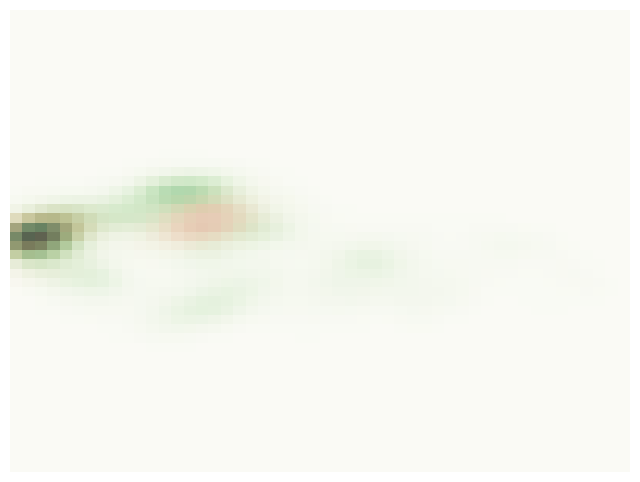

In [ ]:
# Compute KDEs
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
kde1 = gaussian_kde(np.vstack([random_dt_r, random_dm_r]))(positions).reshape(x_grid.shape)
kde2 = gaussian_kde(np.vstack([random_dt_g, random_dm_g]))(positions).reshape(x_grid.shape)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the two KDEs separately
hb1 = ax.pcolormesh(x_grid, y_grid, kde1, cmap="Reds", alpha=0.5)
hb2 = ax.pcolormesh(x_grid, y_grid, kde2, cmap="Greens", alpha=0.5)

# plt.colorbar(hb1, label="Density 1")
# plt.colorbar(hb2, label="Density 2")
# plt.title("Overlapping KDEs with Blended Colors")

ax.set_facecolor('white')

ax.axis('off')
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
buf.seek(0)
image = Image.open(buf)

# Show or save the PIL image
image.show()  # Opens the image in the default image viewer

plt.show()

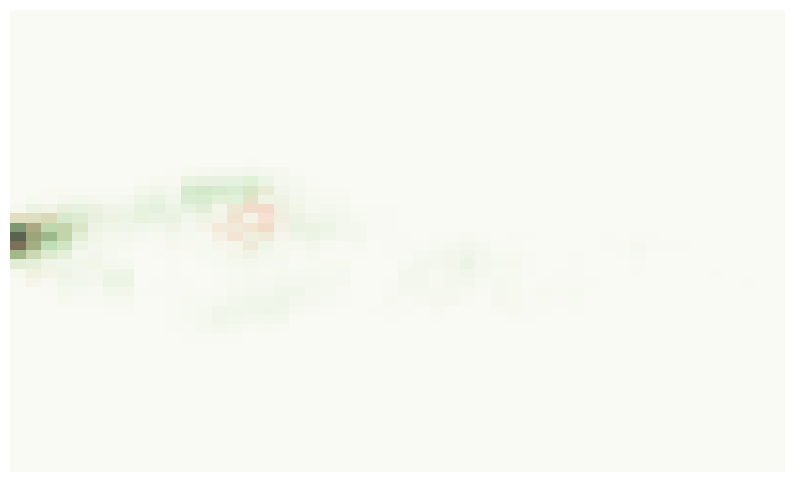

In [ ]:
extent = [[dt_bins[0], dt_bins[-1]], [dm_bins[0], dm_bins[-1]]]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

hist1 = plt.hist2d(random_dt_r, random_dm_r, bins=50, cmap='Reds', alpha=0.5, range=extent, density=True)
hist2 = plt.hist2d(random_dt_g, random_dm_g, bins=50, cmap='Greens', alpha=0.5, range=extent, density=True)
# plt.colorbar(cax=ax, orientation='vertical')
# plt.colorbar(cax=ax, orientation='vertical')
# plt.margins(0.1) # Uncomment this if hex bins are partially outside of plot limits
ax.set_facecolor('white')

ax.axis('off')
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
buf.seek(0)
image = Image.open(buf)

# Show or save the PIL image
image.show()  # Opens the image in the default image viewer

plt.show()

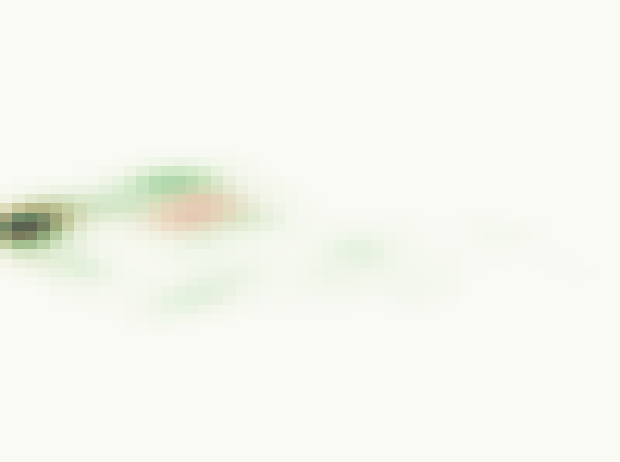

In [ ]:
image

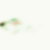

In [ ]:
resized_img = image.resize((50, 50))
resized_img

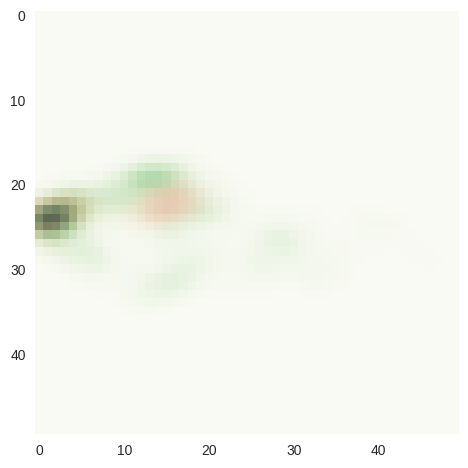

In [ ]:
plt.imshow(resized_img)

NameError: name 'x' is not defined

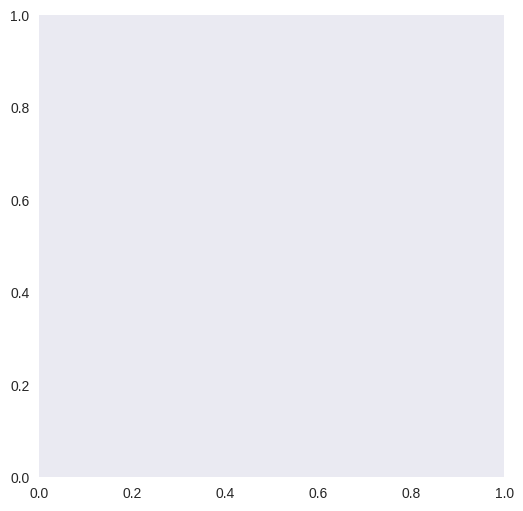

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# Generate the hexbin plot
hb = ax.hexbin(random_dt_g, sm, gridsize=30, cmap='Blues')

# Remove all axis elements
ax.axis('off')  # Turn off axis ticks, labels, grids, etc.

# Save the plot to a buffer
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
plt.close(fig)  # Close the figure to free memory

# Convert buffer to a PIL Image
buf.seek(0)
image = Image.open(buf)

# Show or save the PIL image
image.show()  # Opens the image in the default image viewer
image.save("hexbin_plot_no_axes.png")  # Save the image to disk

buf.close()  # Close the buffer

In [ ]:
### Looping now
grouped = all_lightcurves.groupby(['name', 'band'])
histogram_dict_list = []
num_total_groups = len(grouped)
count = 0

for (name, band), df in grouped:
    count += 1
    print(f'{count}\t/ {num_total_groups} objects in their bands done.')

    df = df.sort_values(by='mjd')
    n_good_det = len(df)
    if n_good_det < 20:
        continue

    mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    dmags, dtimes = get_differenciation(magnitudes=mags, times=times, log_dt=False)
    object_type = df['type'].iloc[0]

    histogram_dict = {'name': name, 'type': object_type, 'band': band, 'n_good_det': n_good_det, 'magnitudes': mags, 'mjd': times, 'dm': dmags, 'dt': dtimes}
    histogram_dict_list.append(histogram_dict)

1	/ 64078 objects in their bands done.
2	/ 64078 objects in their bands done.
3	/ 64078 objects in their bands done.
4	/ 64078 objects in their bands done.
5	/ 64078 objects in their bands done.
6	/ 64078 objects in their bands done.
7	/ 64078 objects in their bands done.
8	/ 64078 objects in their bands done.
9	/ 64078 objects in their bands done.
10	/ 64078 objects in their bands done.
11	/ 64078 objects in their bands done.
12	/ 64078 objects in their bands done.
13	/ 64078 objects in their bands done.
14	/ 64078 objects in their bands done.
15	/ 64078 objects in their bands done.
16	/ 64078 objects in their bands done.
17	/ 64078 objects in their bands done.
18	/ 64078 objects in their bands done.
19	/ 64078 objects in their bands done.
20	/ 64078 objects in their bands done.
21	/ 64078 objects in their bands done.
22	/ 64078 objects in their bands done.
23	/ 64078 objects in their bands done.
24	/ 64078 objects in their bands done.
25	/ 64078 objects in their bands done.
26	/ 6407

In [ ]:
hist_df = DataFrame(histogram_dict_list)
histogram_dict_list = []

In [ ]:
grouped = hist_df.groupby('name')
rbg_band_position_dict = {'r': 0, 'g': 1}

for name, df in grouped:
    rgb_hist = np.zeros((50, 50, 3))
    n_good_det_list = [0, 0]
    hist_p_scale_list = [0, 0]

    for _, row in df.iterrows():
        hist = df.loc[df['band'] == row['band'], 'histogram'].values[0]
        hist_p_scale = hist.sum()
        rgb_hist[:, :, rbg_band_position_dict[row['band']]] = hist / hist_p_scale
        n_good_det = row['n_good_det']
        n_good_det_list[rbg_band_position_dict[row['band']]] = int(n_good_det)
        hist_p_scale_list[rbg_band_position_dict[row['band']]] = int(hist_p_scale)

    object_type = df['type'].iloc[0]
    object_bands = 'rg' if len(df) == 2 else df['band'].iloc[0]

    histogram_dict = {'name': name, 'type': object_type, 'band': object_bands, 'n_good_det': n_good_det_list, 'hist_p_scale': hist_p_scale_list, 'histogram': rgb_hist}
    histogram_dict_list.append(histogram_dict)

In [ ]:
hist_df = DataFrame(histogram_dict_list)
hist_df = hist_df.sort_values(by=['type', 'name'], ignore_index=True)
del histogram_dict_list

In [ ]:
hist_df

,name,type,band,n_good_det,hist_p_scale,histogram
0,1E 22044+468,A,rg,"[697, 439]","[242556, 96141]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,2E 1853.7+4452,A,rg,"[591, 158]","[174345, 12403]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,2MASS J00265121-0159238,A,rg,"[257, 219]","[32896, 23871]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,2MASS J00573811-1406173,A,rg,"[162, 147]","[13041, 10731]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,2MASS J01283395-2358359,A,rg,"[81, 103]","[3240, 5253]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
...,...,...,...,...,...,...
31798,J224028.85-010649.8,Seyfert_1,rg,"[149, 125]","[11026, 7750]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31799,J225452.22+004631.3,Seyfert_1,rg,"[154, 129]","[11781, 8256]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31800,J225737.49-082435.3,Seyfert_1,rg,"[122, 100]","[7381, 4937]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31801,J230323.47-100235.4,Seyfert_1,rg,"[129, 107]","[8256, 5671]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [ ]:
hist_df.reset_index(drop=True).to_pickle(dmdt_by_Name_Band_linear_bins)

### Looking at what the histograms look like

In [ ]:
hist_df = pd.read_pickle(dmdt_by_Name_Band_linear_bins)

Text(0, 0.5, '$dm$')

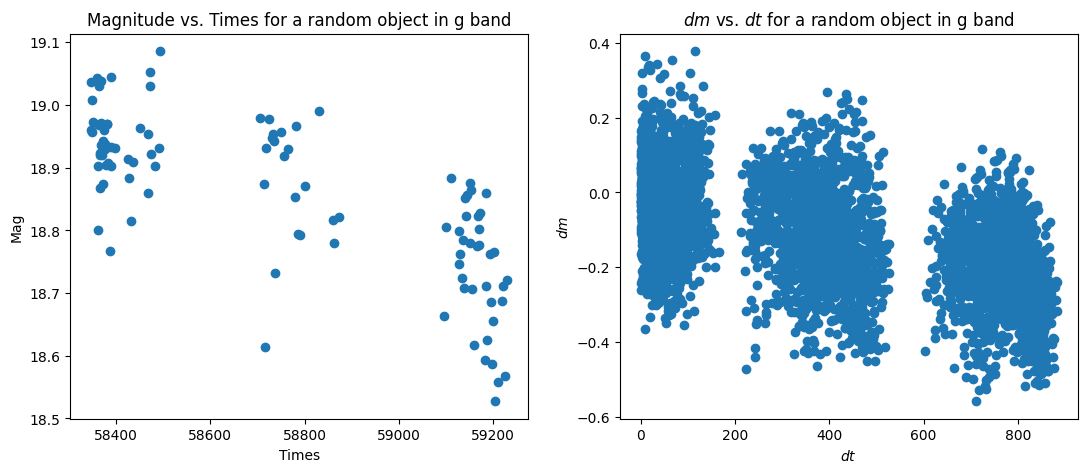

In [ ]:
one_LC = all_lightcurves[(all_lightcurves['name'] == '2MASS J01283395-2358359') & (all_lightcurves['band'] == 'g')]
one_LC = one_LC.sort_values(by='mjd')

mags = one_LC['mag'].to_numpy()
times = one_LC['mjd'].to_numpy()

dm, dt = get_differenciation(mags, times)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

axs[0].scatter(times, mags)
axs[0].set_title('Magnitude vs. Times for a random object in g band')
axs[0].set_xlabel('Times')
axs[0].set_ylabel('Mag')

axs[1].scatter(dt, dm)
axs[1].set_title('$dm$ vs. $dt$ for a random object in g band')
axs[1].set_xlabel('$dt$')
axs[1].set_ylabel('$dm$')

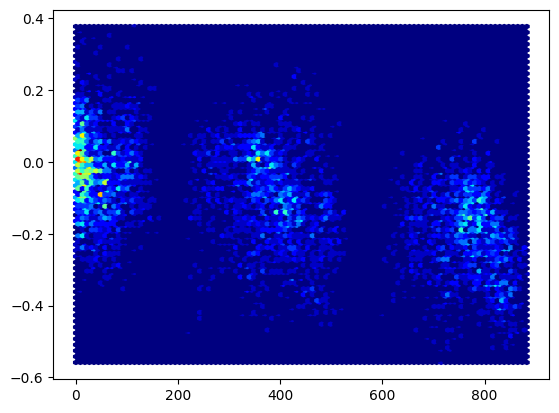

In [ ]:
plt.hexbin(dt, dm, cmap='jet')

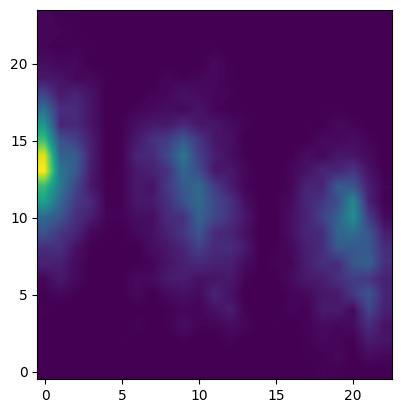

In [ ]:
hist, _, _ = np.histogram2d(dt, dm, bins=[23, 24])
plt.imshow(hist.T, origin='lower', interpolation='bilinear')

In [ ]:
import numpy as np

a = np.array([1.1, 2.7, 3.4, 4.5, 5.9, 6.3])
b = np.array(['a', 'b', 'c', 'd', 'e'])

a_subtract = np.subtract.outer(a, a)
a_subtract_upper_triangle_indices = np.triu_indices_from(a_subtract, k=1)
print('np.subtract.outer(a, a) gives us\n', a_subtract)
print('The upper indices are:\n', a_subtract_upper_triangle_indices)
print('The corresponding elements are:\n', a_subtract[a_subtract_upper_triangle_indices], '\n\n')

# b_add = np.add.outer(b, b)
# b_add_upper_triangle_indices = np.triu_indices_from(b_add, k=1)
# print('np.add.outer(b, b) gives us\n', b_add)
# print('The upper indices are:\n', b_add_upper_triangle_indices)
# print('The corresponding elements are:\n', b_add[b_add_upper_triangle_indices], '\n\n')

np.subtract.outer(a, a) gives us
 [[ 0.  -1.6 -2.3 -3.4 -4.8 -5.2]
 [ 1.6  0.  -0.7 -1.8 -3.2 -3.6]
 [ 2.3  0.7  0.  -1.1 -2.5 -2.9]
 [ 3.4  1.8  1.1  0.  -1.4 -1.8]
 [ 4.8  3.2  2.5  1.4  0.  -0.4]
 [ 5.2  3.6  2.9  1.8  0.4  0. ]]
The upper indices are:
 (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]))
The corresponding elements are:
 [-1.6 -2.3 -3.4 -4.8 -5.2 -0.7 -1.8 -3.2 -3.6 -1.1 -2.5 -2.9 -1.4 -1.8
 -0.4] 




In [ ]:
import math

In [ ]:
print(math.comb(103, 2))

5253


Text(0, 0.5, '$dm$')

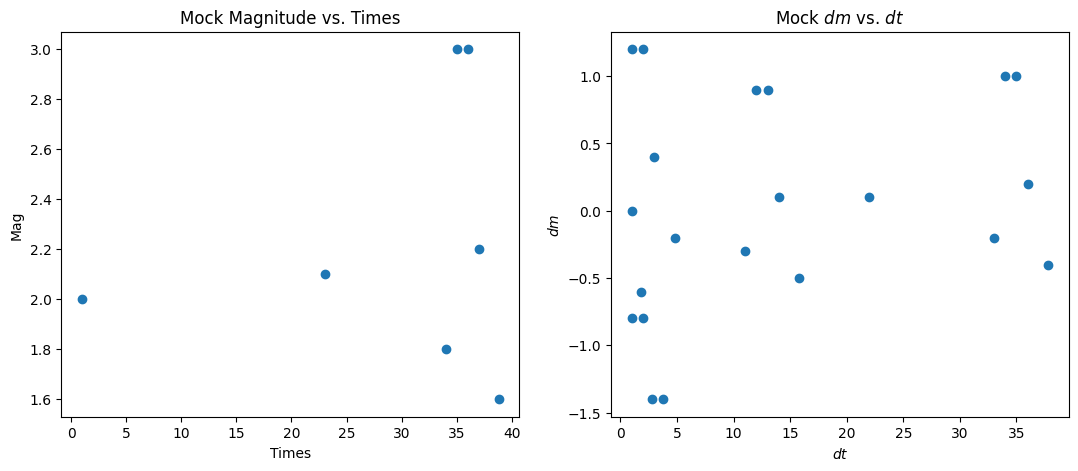

In [ ]:
mock_mags = [2, 2.1, 1.8, 3, 3, 2.2, 1.6]
mock_times = [1, 23, 34, 35, 36, 37, 38.8]

dm, dt = get_differenciation(mock_mags, mock_times)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

axs[0].scatter(mock_times, mock_mags)
axs[0].set_title('Mock Magnitude vs. Times')
axs[0].set_xlabel('Times')
axs[0].set_ylabel('Mag')

axs[1].scatter(dt, dm)
axs[1].set_title('Mock $dm$ vs. $dt$')
axs[1].set_xlabel('$dt$')
axs[1].set_ylabel('$dm$')

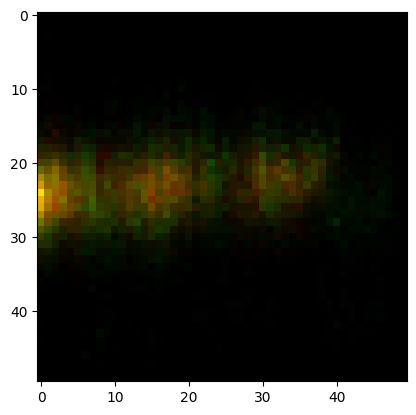

In [ ]:
lc1 = hist_df['histogram'].iloc[1000]

plt.imshow(lc1 / lc1.max())

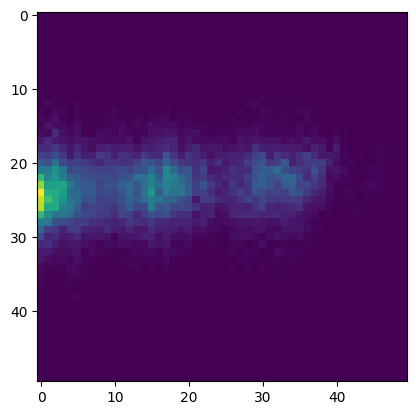

In [ ]:
plt.imshow(lc1[:, :, 0])

Text(0, 0.5, '$dm$')

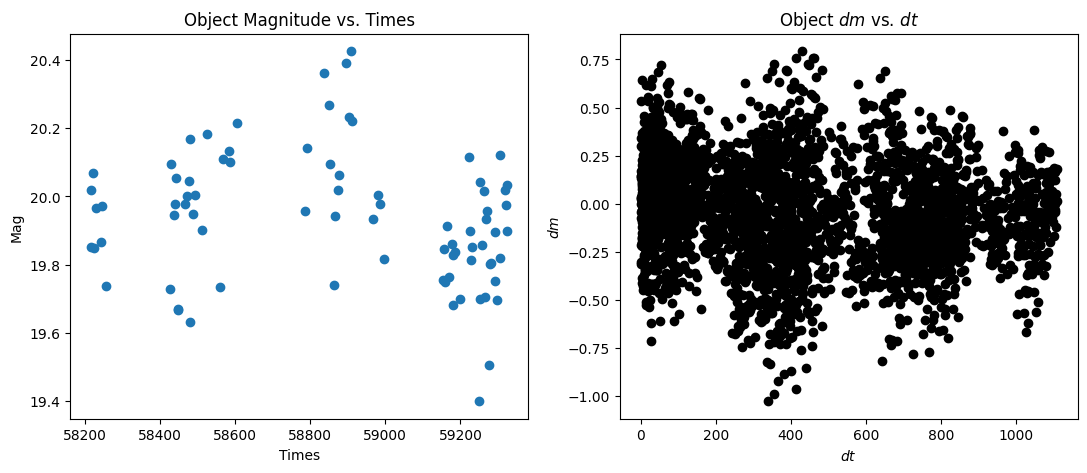

In [ ]:
obj_name = hist_df['name'].iloc[45]
obj_df = all_lightcurves[(all_lightcurves['name'] == obj_name) & (all_lightcurves['band'] == 'r')]
obj_df = obj_df.sort_values(by='mjd')

mags, times = obj_df['mag'].to_numpy(), obj_df['mjd'].to_numpy()
dm, dt = get_differenciation(mags, times)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axs[0].scatter(times, mags)
axs[0].set_title('Object Magnitude vs. Times')
axs[0].set_xlabel('Times')
axs[0].set_ylabel('Mag')

axs[1].plot(dt, dm, 'ko')
axs[1].set_title('Object $dm$ vs. $dt$')
axs[1].set_xlabel('$dt$')
axs[1].set_ylabel('$dm$')

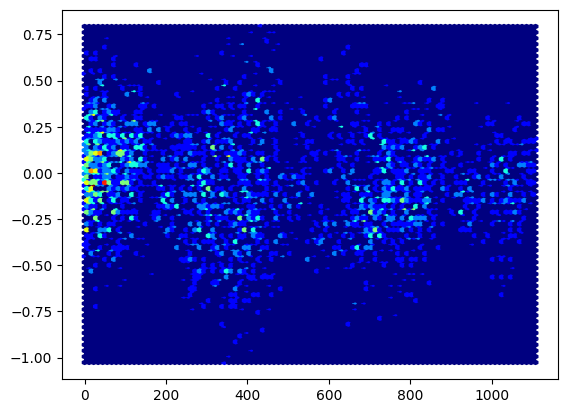

In [ ]:
plt.hexbin(dt, dm, cmap='jet')

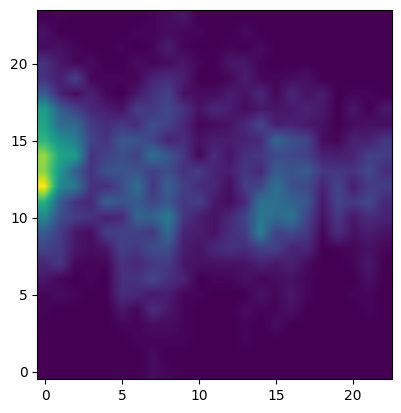

In [ ]:
hist, _, _ = np.histogram2d(dt, dm, bins=[23, 24])
plt.imshow(hist.T / hist.sum(), origin='lower', interpolation='bilinear')

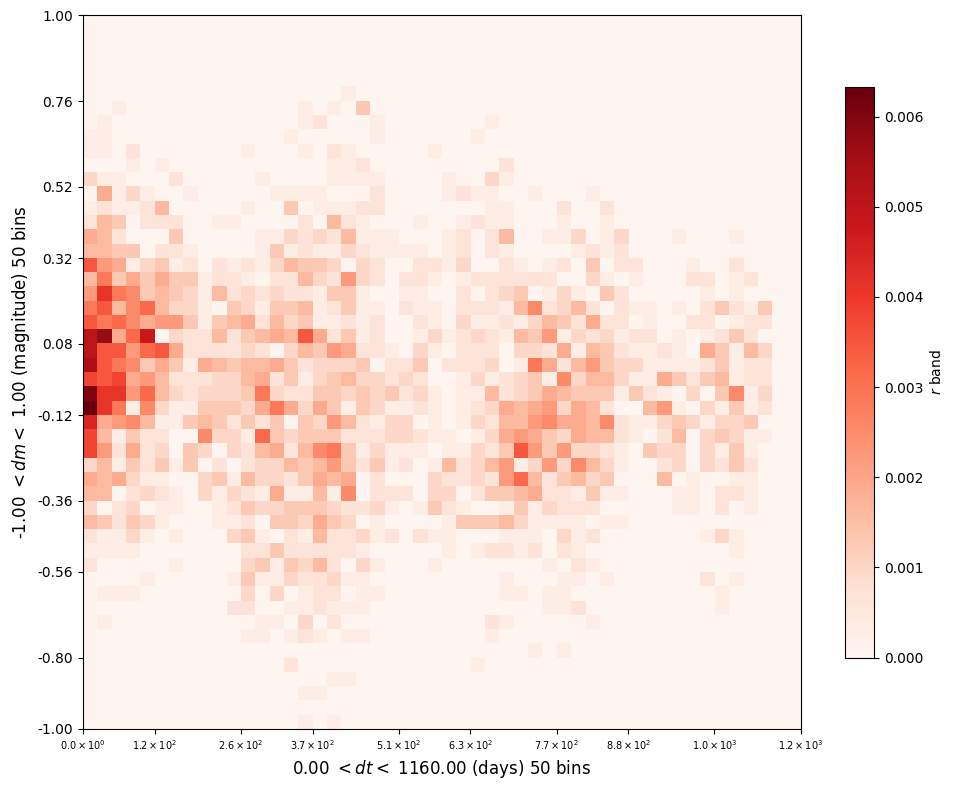

In [ ]:
plot_dm_dt(hist_df['histogram'].iloc[45], 'r', dm_bins, dt_bins)

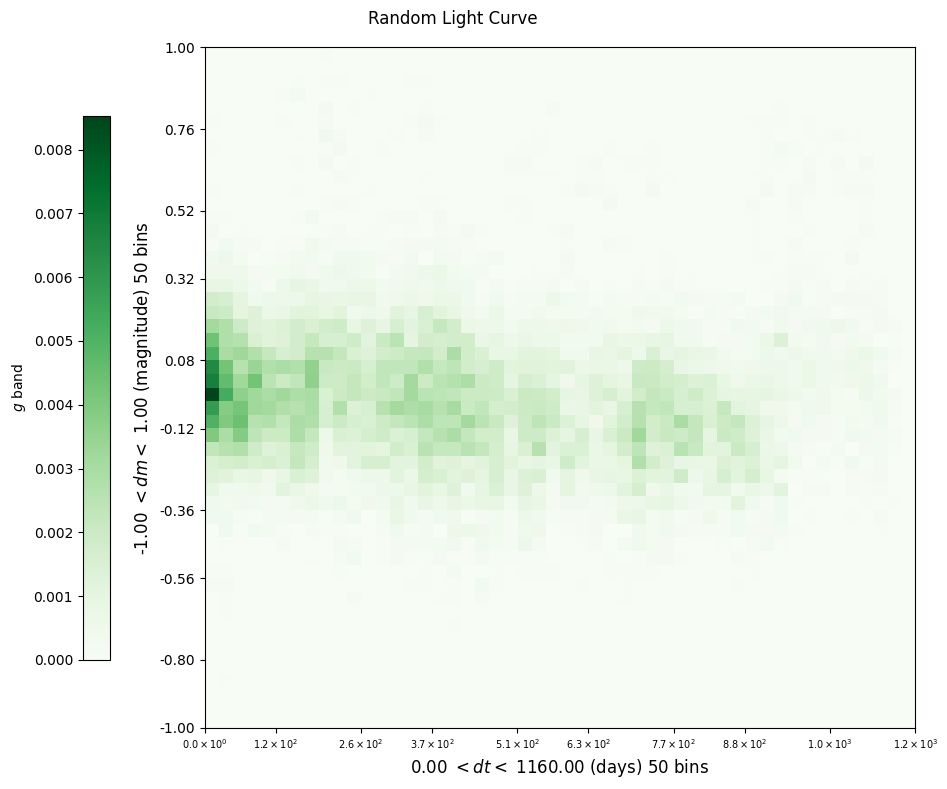

In [ ]:
plot_dm_dt(lc1, band='g', dm_bins=dm_bins, dt_bins=dt_bins, title='Random Light Curve')

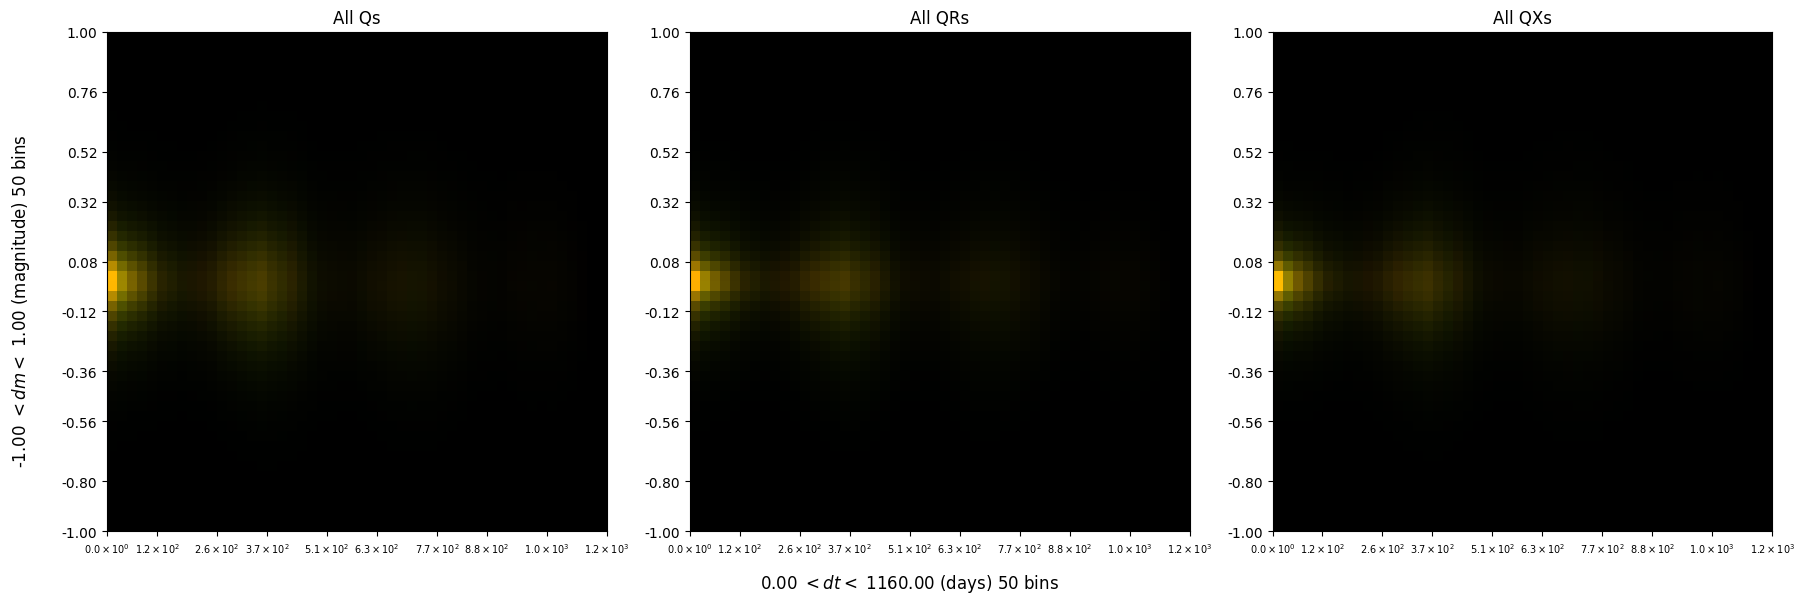

In [ ]:
tot_Qs = hist_df[hist_df['type'] == 'Q']['histogram'].sum()
tot_QRs = hist_df[hist_df['type'] == 'QR']['histogram'].sum()
tot_QXs = hist_df[hist_df['type'] == 'QX']['histogram'].sum()

to_plot = [tot_Qs, tot_QRs, tot_QXs]
titles = ['All Qs', 'All QRs', 'All QXs']
dm_nticks, dt_nticks = 10, 10

dm_indices = linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for hist, ax, title in zip(to_plot, axs, titles):
    ax.imshow(hist / hist.max(), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)

plt.tight_layout()

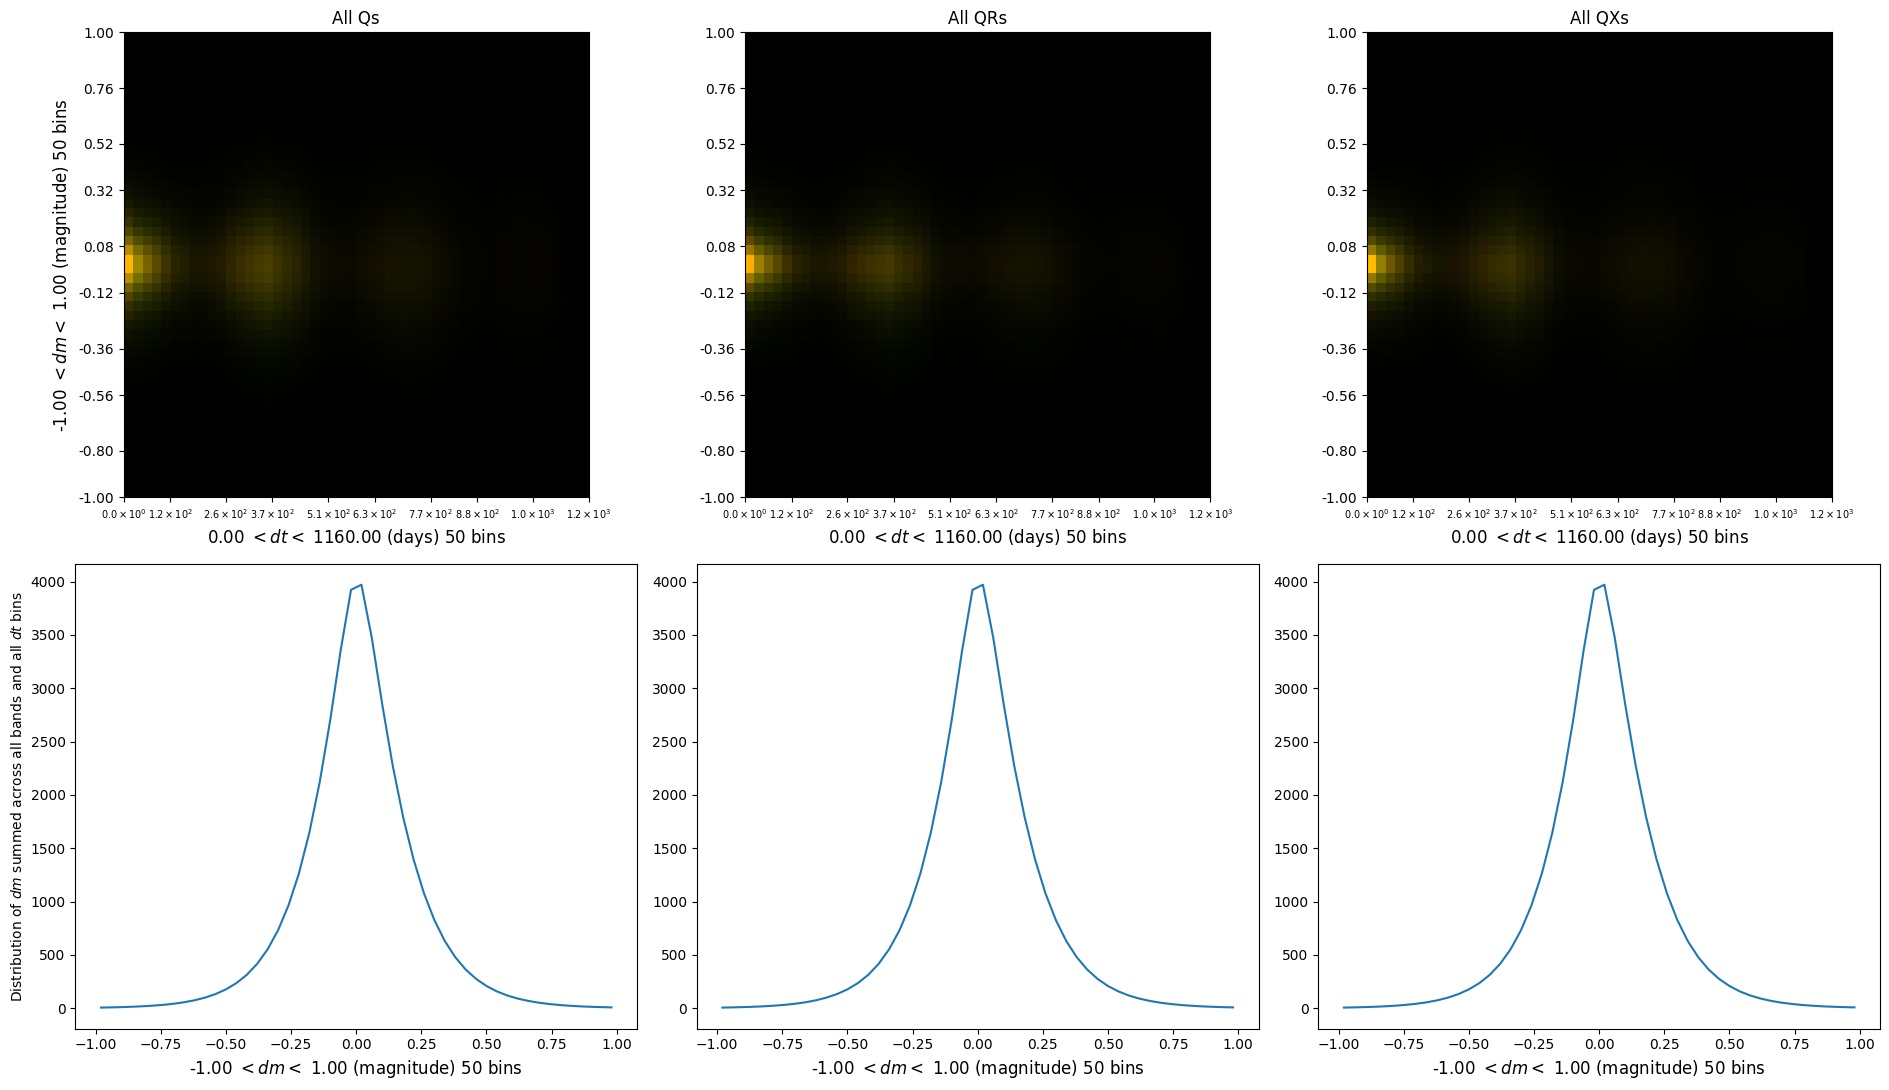

In [ ]:
tot_Qs = hist_df[hist_df['type'] == 'Q']['histogram'].sum()
tot_QRs = hist_df[hist_df['type'] == 'QR']['histogram'].sum()
tot_QXs = hist_df[hist_df['type'] == 'QX']['histogram'].sum()

dm_hsit_Q = np.array([tot_Qs[i, :, :].sum() for i in range(tot_Qs.shape[0])])
dm_hsit_Q = np.array([tot_Qs[i, :, :].sum() for i in range(tot_Qs.shape[0])])
dm_hsit_Q = np.array([tot_Qs[i, :, :].sum() for i in range(tot_Qs.shape[0])])

to_plot = [tot_Qs, tot_QRs, tot_QXs]

titles = ['All Qs', 'All QRs', 'All QXs']
dm_nticks, dt_nticks = 10, 10

to_plot2 = [dm_hsit_Q, dm_hsit_Q, dm_hsit_Q]
titles = ['All Qs', 'All QRs', 'All QXs']

dm_indices = linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19, 11))

for hist, ax, title in zip(to_plot, axs[0, :], titles):
    ax.imshow(hist / hist.max(), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
    ax.set_xlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
axs[0, 0].set_ylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.00001)

for distribution, ax, title in zip(to_plot2, axs[1, :], titles):
    ax.plot((dm_bins[:-1] + dm_bins[1:]) / 2, distribution)
    ax.set_xlabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12)
axs[1, 0].set_ylabel('Distribution of $dm$ summed across all bands and all $dt$ bins')


plt.tight_layout()

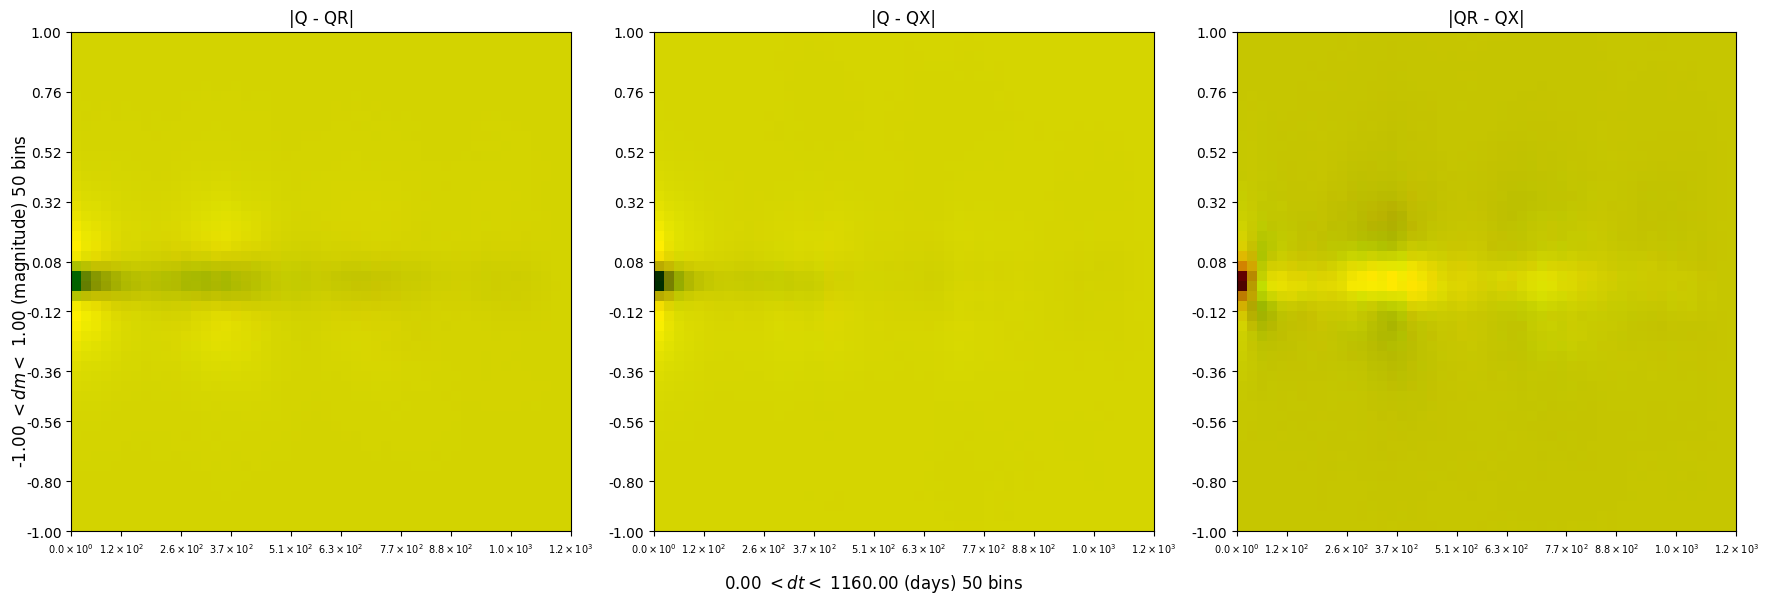

In [ ]:
tot_Qs = hist_df[hist_df['type'] == 'Q']['histogram'].sum()
tot_QRs = hist_df[hist_df['type'] == 'QR']['histogram'].sum()
tot_QXs = hist_df[hist_df['type'] == 'QX']['histogram'].sum()

tot_Qs = tot_Qs / tot_Qs.sum()
tot_QRs = tot_QRs / tot_QRs.sum()
tot_QXs = tot_QXs / tot_QXs.sum()

diff_Q_QR = tot_Qs - tot_QRs
diff_Q_QX = tot_Qs - tot_QXs
diff_QR_QX = tot_QRs - tot_QXs

to_plot = [diff_Q_QR, diff_Q_QX, diff_QR_QX]
titles = ['|Q - QR|', '|Q - QX|', '|QR - QX|']
dm_nticks, dt_nticks = 10, 10

dm_indices = linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for hist, ax, title in zip(to_plot, axs, titles):
    hist = (hist - hist[:, :, :-1].min()) / (hist[:, :, :-1].max() - hist[:, :, :-1].min())
    hist[:, :, 2] = np.zeros_like(hist[:, :, 2])
    ax.imshow(hist, extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12)

plt.tight_layout()

In [ ]:
dm_bins

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
       -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
       -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
        0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
        0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
        0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ])

In [ ]:
def plot_n_objects(all_lightcurves, object_type, n, band, save_path='subplots.png'):
    df = all_lightcurves[(all_lightcurves['type'] == object_type) & (all_lightcurves['band'] == band)].copy()
    df = df.sort_values(by=['name', 'mjd'])
    names = np.random.choice(df['name'].unique(), n, replace=False)

    total_m, total_t = [], []
    total_dm, total_dt = [], []

    fig, axes = plt.subplots(n+1, 5, figsize=(19, 4 * n))

    # If n is 1, axes will be a 1D array; make it 2D for consistency
    if n == 1:
        axes = axes[np.newaxis, :]

    # Generate plots for each row
    for i, name in enumerate(names):
        mags, times = df[df['name'] == name]['mag'].to_numpy(), df[df['name'] == name]['mjd'].to_numpy()
        dm, dt = get_differenciation(mags, times)
        total_dm = np.r_[total_dm, dm]
        total_dt = np.r_[total_dt, dt]
        total_m = np.r_[total_m, mags]
        total_t = np.r_[total_t, times]

        axes[i, 0].scatter(times, mags, s=1)
        axes[i, 0].set_ylabel(f'{object_type} Object: {name}')

        axes[i, 1].scatter(dt, dm, s=1)
        axes[i, 1].set_xlim(dt_bins[0], dt_bins[-1])
        axes[i, 1].set_ylim(dm_bins[0], dm_bins[-1])

        hist, _, _ = np.histogram2d(dt, dm, bins=[dt_bins, dm_bins])
        axes[i, 2].imshow(hist.T, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], aspect='auto', cmap='viridis')

        axes[i, 3].hexbin(dt, dm, mincnt=1, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], cmap='viridis')

        axes[i, 4].hexbin(dt, dm, bins='log', mincnt=1, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], cmap='viridis')


    axes[n, 0].scatter(total_t, total_m, s=1)
    axes[n, 0].set_ylabel('Total')

    axes[n, 1].scatter(total_dt, total_dm, s=1)
    axes[n, 1].set_xlim(dt_bins[0], dt_bins[-1])
    axes[n, 1].set_ylim(dm_bins[0], dm_bins[-1])

    hist, _, _ = np.histogram2d(total_dt, total_dm, bins=[dt_bins, dm_bins])
    axes[n, 2].imshow(hist.T, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], aspect='auto', cmap='viridis')

    axes[n, 3].hexbin(total_dt, total_dm, mincnt=1, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], cmap='viridis')

    axes[n, 4].hexbin(total_dt, total_dm, bins='log', mincnt=1, extent=[dt_bins[0], dt_bins[-1], dm_bins[0], dm_bins[-1]], cmap='viridis')


    # Adjust layout
    plt.tight_layout()

    # Save the resulting plot grid to disk
    # lt.savefig(save_path)
    # print(f"Plot saved to {save_path}")

    # Display the plot
    plt.show()

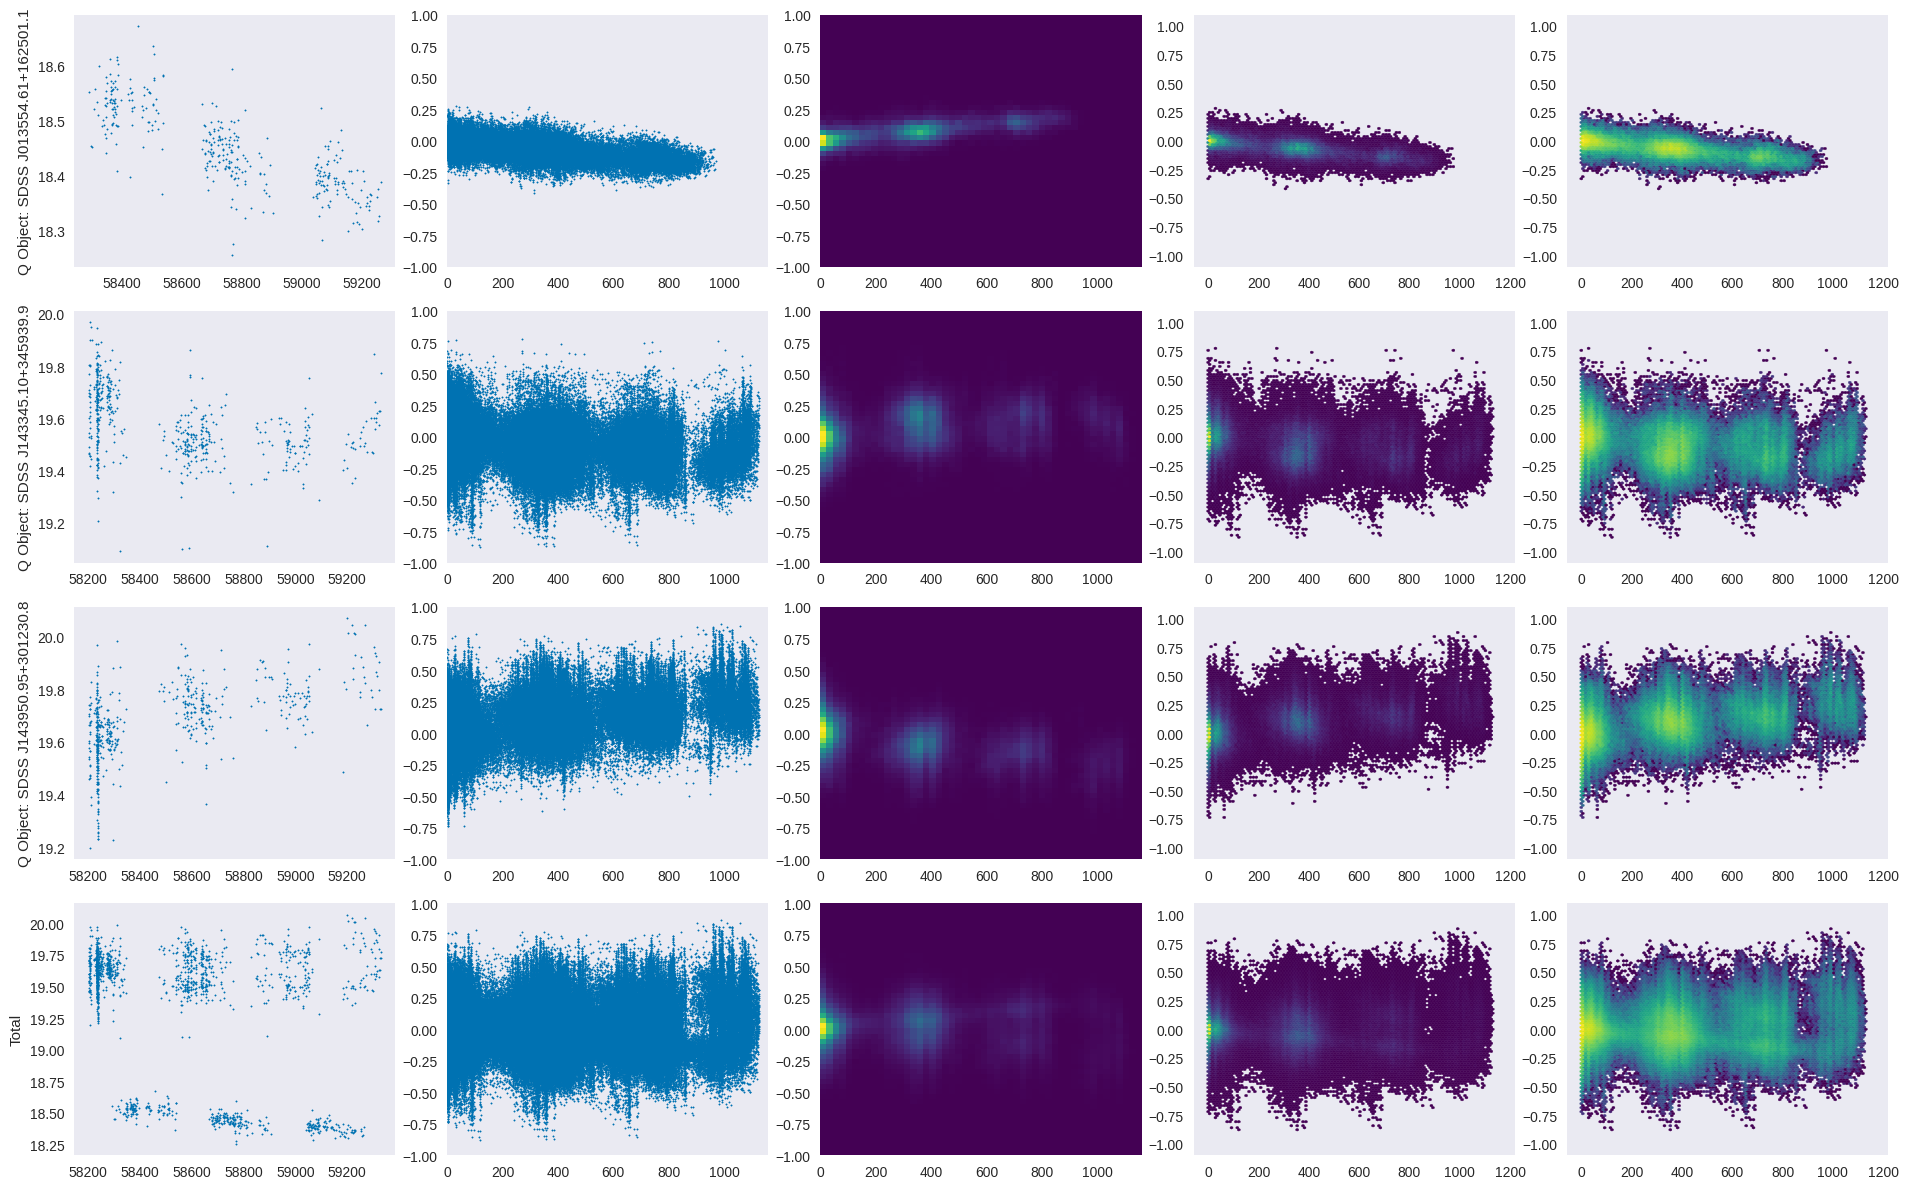

In [ ]:
plot_n_objects(all_lightcurves, 'Q', 3, 'g')